# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **sports or athletics**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **sports or athletics**?  For this category we are interested in sporting events or athletics broadly, please feel free to creatively interpret the category when building your research question!

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

# Location of Datasets
- Michigan data: https://www.pro-football-reference.com/schools/michigan/drafted.htm
- NFL draft data: http://nflsavant.com/about.php
- geo data on 1000 largest cities in the U.S.: https://gist.github.com/Miserlou/c5cd8364bf9b2420bb29

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

df = pd.read_csv('NFLplayers2.csv')

# narrow df to players that were drafted
df = df[~df['draft_team'].isnull()]

# there is an error in draft_pick with a value of 'nd' - remove this
df = df[df['draft_pick'] != 'nd']

# convert draft pick to integer
def convert_pick(value):
    return re.findall('[0-9]+', value)[0]

df['draft_pick'] = df['draft_pick'].apply(lambda x: convert_pick(x))
df['draft_pick'] = df['draft_pick'].astype('int64')
df['draft_pick'][:5]

# remove draft_teams with '/' (e.g. Bos/Bkn Yanks/Tigers)
df = df[~df['draft_team'].str.contains('/')]

# Remove teams that are no longer around
teams_gone = ['Yanks', 'Brooklyn Dodgers', 'Brooklyn Tigers', 'Dallas Texans', 'New York Bulldogs', 'Baltimore Colts',
              'Boston Patriots', 'Boston Redskins', 'Chicago Cardinals', 'Cleveland Rams', 'Houston Oilers', 'New York Titans', 
              'Phoenix Cardinals', 'Pittsburgh Pirates', 'St. Louis Cardinals', 'St. Louis Rams', 'Tennessee Oilers', 'Los Angeles Raiders'
             ]
for team in teams_gone:
    df = df[~df['draft_team'].str.contains(team)]

# drop unnecessary columns
df.drop(['first_name', 'last_name', 'draft_round', 'death_date', 'death_city', 'death_state', 'death_country', 'year_start', 'year_end'], axis=1, inplace=True)

# drop players missing birth state
df = df[~df['birth_state'].isnull()]

df.head()

,name,birth_city,birth_state,birth_country,birth_date,draft_team,draft_pick,draft_year,position,height,weight
4,Karim Abdul-Jabbar,Los Angeles,CA,USA,6/28/1974,Miami Dolphins,80,1996.0,RB,10-May,194.0
6,Hamza Abdullah,Los Angeles,CA,USA,8/20/1983,Tampa Bay Buccaneers,231,2005.0,DB,2-Jun,213.0
8,Khalid Abdullah,Jacksonville,FL,USA,3/6/1979,Cincinnati Bengals,136,2003.0,LB,2-Jun,227.0
10,Rahim Abdullah,Jacksonville,FL,USA,3/22/1976,Cleveland Browns,45,1999.0,LB,5-Jun,233.0
12,Bud Abell,Kansas City,MO,USA,12/21/1940,Kansas City Chiefs,178,1964.0,LB,3-Jun,220.0


In [2]:
#### read in file on University of Michigan players drafted into the NFL
df_mich = pd.read_table('michigan_draft.txt', sep=',', header=1)

# drop unnecessary columns and redundant columns (already in previous data frame)
df_mich.drop(['Rk', 'Lg', 'Unnamed: 8', 'Rnd', 'Pos', 'Pick'], axis=1, inplace=True)

# make player format same as other data frame
def name_format(value):
    return re.split(r'\\', value)[0]
df_mich['Player'] = df_mich['Player'].apply(lambda x: name_format(x))

# make column names consistent with previous data frame
df_mich.columns = ['draft_year', 'draft_team', 'name']

# only consider up to 2013 since previous data frame stops at that year - then get rid of the year column
df_mich = df_mich[df_mich['draft_year'] <= 2013]
df_mich.drop('draft_year', axis=1, inplace=True)

# create a new column specifying that these players played for University of Michigan
df_mich['Mich'] = pd.Series(data=[1]*len(df_mich), index=df_mich.index)

# drop players drafted by teams that don't exist anymore
df_mich = df_mich[~df_mich['draft_team'].str.contains('DTX')]
df_mich = df_mich[~df_mich['draft_team'].str.contains('BKN')]

# convert draft_team to full name
def convert_team(value):
    team_dic = {'JAX': 'Jacksonville Jaguars',
                'NYJ': 'New York Jets',
                'TEN': 'Tennessee Titans',
                'SDG': 'San Diego Chargers',
                'KAN': 'Kansas City Chiefs',
                'PHI': 'Philadelphia Eagles',
                'NWE': 'New England Patriots',
                'OAK': 'Oakland Raiders',
                'IND': 'Indianapolis Colts',
                'CIN': 'Cincinnati Bengals',
                'MIA': 'Miami Dolphins',
                'NYG': 'New York Giants',
                'NOR': 'New Orleans Saints',
                'ARI': 'Arizona Cardinals',
                'PIT': 'Pittsburgh Steelers',
                'BAL': 'Baltimore Ravens',
                'WAS': 'Washington Redskins',
                'TAM': 'Tampa Bay Buccaneers',
                'CLE': 'Cleveland Browns',
                'SFO': 'San Francisco 49ers',
                'DEN': 'Denver Broncos',
                'HOU': 'Houston Texans',
                'CHI': 'Chicago Bears',
                'SEA': 'Seattle Seahawks',
                'DET': 'Detroit Lions',
                'CAR': 'Carolina Panthers',
                'BUF': 'Buffalo Bills',
                'RAI': 'Oakland Raiders',
                'RAM': 'Los Angeles Rams',
                'MIN': 'Minnesota Vikings',
                'DAL': 'Dallas Cowboys',
                'STL': 'Arizona Cardinals',
                'ATL': 'Atlanta Falcons',
                'GNB': 'Green Bay Packers',
                'BOS': 'New England Patriots',
                'NYT': 'New York Jets',
                'CRD': 'Arizona Cardinals'
               }
    if value in list(team_dic.keys()):
        return team_dic[value]
    else:
        return value
    
df_mich['draft_team'] = df_mich['draft_team'].apply(lambda x: convert_team(x))

df_mich.head()

,draft_team,name,Mich
43,Jacksonville Jaguars,Denard Robinson,1
44,New York Jets,William Campbell,1
45,Tennessee Titans,Mike Martin,1
46,San Diego Chargers,David Molk,1
47,Kansas City Chiefs,Junior Hemingway,1


In [3]:
# merge data frames
df_merge = pd.merge(left=df, right=df_mich, how='left', on=['name', 'draft_team'])

# replace nan values in Mich to 0 to indicate they did not attend University of Michigan
df_merge['Mich'] = df_merge['Mich'].replace(to_replace=np.nan, value=0)

# only keep bare minimum for analysis
df_merge.drop(['birth_city', 'birth_country', 'birth_date', 'draft_year', 'position', 'height', 'weight'], axis=1, inplace=True)

df_merge.head()

,name,birth_state,draft_team,draft_pick,Mich
0,Karim Abdul-Jabbar,CA,Miami Dolphins,80,0.0
1,Hamza Abdullah,CA,Tampa Bay Buccaneers,231,0.0
2,Khalid Abdullah,FL,Cincinnati Bengals,136,0.0
3,Rahim Abdullah,FL,Cleveland Browns,45,0.0
4,Bud Abell,MO,Kansas City Chiefs,178,0.0


In [4]:
!pip install geopy

    100% |████████████████████████████████| 112kB 4.9MB/s 
You are using pip version 9.0.1, however version 21.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
# read in geographic data to determine distance of birth state from Michigan
df_geo = pd.read_json('cities.json')
df_geo.drop(['growth_from_2000_to_2013', 'population', 'rank'], axis=1, inplace=True)

# add a column for distance from Michigan
from geopy.distance import great_circle

AnnArbor = df_geo[df_geo['city']=='Ann Arbor'].values[0]

def determine_distance(row):
    return great_circle((row['latitude'], row['longitude']), (AnnArbor[1], AnnArbor[2])).kilometers

df_geo['distance'] = df_geo.apply(lambda x: determine_distance(x), axis=1)

# group by state to get an average distance from each state to Michigan
df_geo = df_geo.groupby(by='state')['distance'].agg(np.mean)

# set Michigan value to 0
df_geo['Michigan']  = 0

# rename states to their abbreviation to match other data frame
df_geo.index = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 
                'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 
                'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

# set Alaska and Hawaii value to same as California, so there aren't huge outliers
df_geo['AK'] = df_geo['CA']
df_geo['HI'] = df_geo['CA']

df_geo.head()

AL    1045.103030
AK    3153.254290
AZ    2667.819912
AR    1108.940498
CA    3153.254290
Name: distance, dtype: float64

In [6]:
# add geographic data to data frame
def distance(value):
    return df_geo[value]

df_merge['birth_distance'] = df_merge['birth_state'].apply(lambda x: distance(x))
df_merge.head()

,name,birth_state,draft_team,draft_pick,Mich,birth_distance
0,Karim Abdul-Jabbar,CA,Miami Dolphins,80,0.0,3153.254290
1,Hamza Abdullah,CA,Tampa Bay Buccaneers,231,0.0,3153.254290
2,Khalid Abdullah,FL,Cincinnati Bengals,136,0.0,1690.508445
3,Rahim Abdullah,FL,Cleveland Browns,45,0.0,1690.508445
4,Bud Abell,MO,Kansas City Chiefs,178,0.0,841.176468


In [7]:
# let's also determine the distance of teams from Michigan
def team_distance(value):
    team_dist_dic = {'Jacksonville Jaguars': 'FL',
                'New York Jets': 'NY',
                'Tennessee Titans': 'TN',
                'San Diego Chargers': 'CA',
                'Kansas City Chiefs': 'MO',
                'Philadelphia Eagles': 'PA',
                'New England Patriots': 'MA',
                'Oakland Raiders': 'CA',
                'Indianapolis Colts': 'IN',
                'Cincinnati Bengals': 'OH',
                'Miami Dolphins': 'FL',
                'New York Giants': 'NY',
                'New Orleans Saints': 'LA',
                'Arizona Cardinals': 'AZ',
                'Pittsburgh Steelers': 'PA',
                'Baltimore Ravens': 'MD',
                'Washington Redskins': 'VA',
                'Tampa Bay Buccaneers': 'FL',
                'Cleveland Browns': 'OH',
                'San Francisco 49ers': 'CA',
                'Denver Broncos': 'CO',
                'Houston Texans': 'TX',
                'Chicago Bears': 'IL',
                'Seattle Seahawks': 'WA',
                'Detroit Lions': 'MI',
                'Carolina Panthers': 'NC',
                'Buffalo Bills': 'NY',
                'Los Angeles Rams': 'CA',
                'Minnesota Vikings': 'MN',
                'Dallas Cowboys': 'TX',
                'Atlanta Falcons': 'GA',
                'Green Bay Packers': 'WI',
               }
    return df_geo[team_dist_dic[value]]

df_merge['team_distance'] = df_merge['draft_team'].apply(lambda x: team_distance(x))
df_merge.head()

,name,birth_state,draft_team,draft_pick,Mich,birth_distance,team_distance
0,Karim Abdul-Jabbar,CA,Miami Dolphins,80,0.0,3153.254290,1690.508445
1,Hamza Abdullah,CA,Tampa Bay Buccaneers,231,0.0,3153.254290,1690.508445
2,Khalid Abdullah,FL,Cincinnati Bengals,136,0.0,1690.508445,238.776205
3,Rahim Abdullah,FL,Cleveland Browns,45,0.0,1690.508445,238.776205
4,Bud Abell,MO,Kansas City Chiefs,178,0.0,841.176468,841.176468


# Group by Mich

In [8]:
# group by 1) distance of birth_state, 2) draft_team's state distance, and 3) if they attended University of Michigan
x = df_merge.groupby(by=['birth_distance', 'team_distance', 'Mich'])['name'].agg(np.size)
x = x.unstack()
x.reset_index(inplace=True)
x = x.replace(to_replace=np.nan, value=0)
x.columns = ['birth_distance', 'team_distance', 'noMich', 'Mich']
x['Mich_ratio'] = x['Mich'] / (x['noMich'] + x['Mich'])

x.head()

,birth_distance,team_distance,noMich,Mich,Mich_ratio
0,0.0,0.000000,39.0,4.0,0.093023
1,0.0,238.776205,22.0,4.0,0.153846
2,0.0,328.577726,7.0,0.0,0.000000
3,0.0,395.333679,16.0,0.0,0.000000
4,0.0,424.942567,14.0,5.0,0.263158


In [9]:
#%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6), sharey=True)
ax1.scatter(x['team_distance'], x['birth_distance'], marker='o', s=x['Mich']*50, edgecolors='black', facecolors='red')
ax2.scatter(x['team_distance'], x['birth_distance'], marker='o', s=x['noMich']*2, edgecolors='black', facecolors='red')
ax1.set_xlabel('Distance of draft team\'s state from Michigan (km)')
ax1.set_ylabel('Distance of birth state from Michigan (km)')
ax2.set_xlabel('Distance of draft team\'s state from Michigan (km)')



In [10]:
z_nomich = x[['birth_distance', 'team_distance', 'noMich']]
z_nomich.set_index(keys=['birth_distance', 'team_distance'], inplace=True)
z_nomich = z_nomich.unstack()
z_nomich = z_nomich.replace(to_replace=np.nan, value=0)
z_nomich = z_nomich.values

z_mich = x[['birth_distance', 'team_distance', 'Mich']]
z_mich.set_index(keys=['birth_distance', 'team_distance'], inplace=True)
z_mich = z_mich.unstack()
z_mich = z_mich.replace(to_replace=np.nan, value=0)
z_mich = z_mich.values

z_ratio = x[['birth_distance', 'team_distance', 'Mich']]
z_ratio.set_index(keys=['birth_distance', 'team_distance'], inplace=True)
z_ratio = z_ratio.unstack()
z_ratio = z_ratio.replace(to_replace=np.nan, value=0)
z_ratio = z_ratio.values

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6), sharey=True)

import seaborn as sn
sn.heatmap(z_ratio, ax=ax1)
sn.heatmap(z_nomich, ax=ax2)

<IPython.core.display.Javascript object>


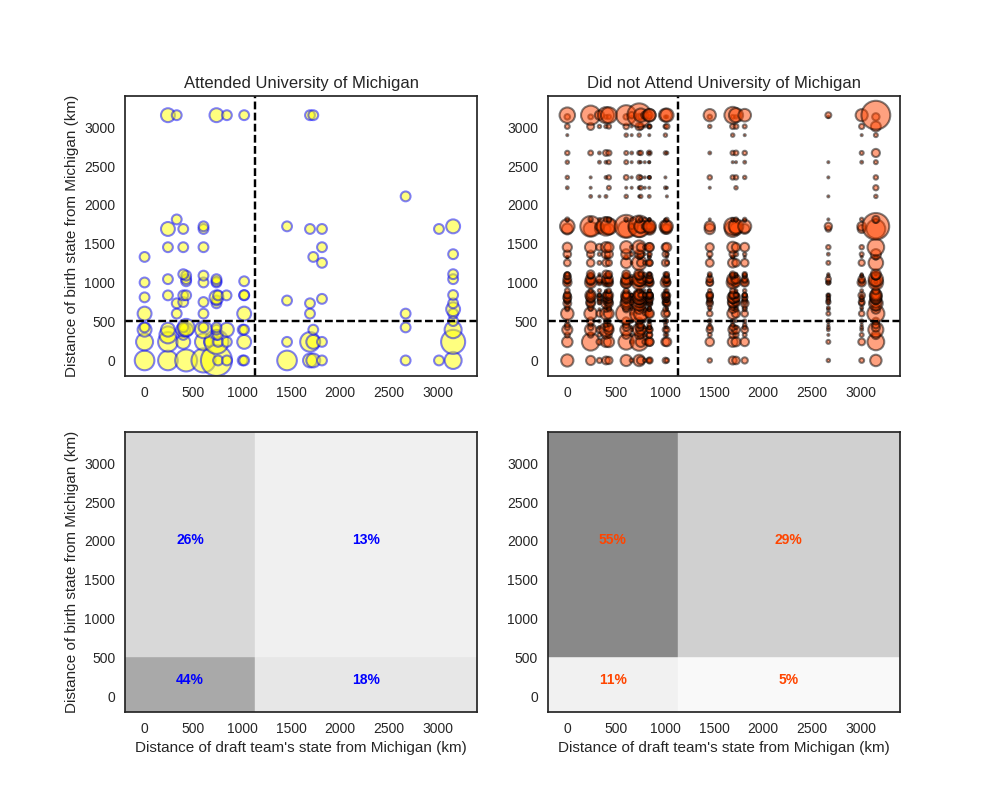

In [48]:
%matplotlib notebook
from matplotlib.patches import Rectangle

sn.set_style('white')

x_threshold = 1000
y_threshold = 500

mask_1 = (x['team_distance'] < x_threshold) & (x['birth_distance'] < y_threshold)   # lower left
mask_2 = (x['team_distance'] < x_threshold) & (x['birth_distance'] >= y_threshold)  # upper left
mask_3 = (x['team_distance'] >= x_threshold) & (x['birth_distance'] < y_threshold)  # lower right
mask_4 = (x['team_distance'] >= x_threshold) & (x['birth_distance'] >= y_threshold) # upper right

cmap = plt.get_cmap('Greys')
scale = 1

fig, ((ax3, ax4), (ax1, ax2)) = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(10,8))

extra_space = -200
axis_max = 3400
ax1.axis([extra_space, axis_max, extra_space, axis_max])
ax2.axis([extra_space, axis_max, extra_space, axis_max])

ax1.set_xlabel('Distance of draft team\'s state from Michigan (km)')
ax1.set_ylabel('Distance of birth state from Michigan (km)')
ax2.set_xlabel('Distance of draft team\'s state from Michigan (km)')

# Top plots
ax3.scatter(x['team_distance'], x['birth_distance'], marker='o', s=x['Mich']*50, edgecolors='blue', facecolors='yellow', linewidths=1.5, alpha=0.5)
ax4.scatter(x['team_distance'], x['birth_distance'], marker='o', s=x['noMich']*2, edgecolors='black', facecolors='orangered', linewidths=1.5, alpha=0.5)

ax3.plot([extra_space, axis_max], [y_threshold, y_threshold], ls='--', color='black')
ax3.plot([x_threshold, x_threshold], [extra_space, axis_max], ls='--', color='black')
ax4.plot([extra_space, axis_max], [y_threshold, y_threshold], ls='--', color='black')
ax4.plot([x_threshold, x_threshold], [extra_space, axis_max], ls='--', color='black')

ax3.set_ylabel('Distance of birth state from Michigan (km)')
ax3.set_title('Attended University of Michigan')
ax4.set_title('Did not Attend University of Michigan')

#### Michigan
x1 = x[mask_1]['Mich'].sum() # lower left
x2 = x[mask_2]['Mich'].sum() # upper left
x3 = x[mask_3]['Mich'].sum() # lower right
x4 = x[mask_4]['Mich'].sum() # upper right

x_total = x['Mich'].sum()
x1 /= x_total
x2 /= x_total
x3 /= x_total
x4 /= x_total

x1_text = int(round(x1*100))
x2_text = int(round(x2*100))
x3_text = int(round(x3*100))
x4_text = int(round(x4*100))

x1 = cmap(x1 * scale)
x2 = cmap(x2 * scale)
x3 = cmap(x3 * scale)
x4 = cmap(x4 * scale)

ax1.add_patch(Rectangle((x_threshold, y_threshold), -1*x_threshold+extra_space, -1*y_threshold+extra_space, color=x1))
ax1.add_patch(Rectangle((x_threshold, y_threshold), -1*x_threshold+extra_space, axis_max-y_threshold, color=x2))
ax1.add_patch(Rectangle((x_threshold, y_threshold), axis_max-x_threshold, -1*y_threshold+extra_space, color=x3))
ax1.add_patch(Rectangle((x_threshold, y_threshold), axis_max-x_threshold, axis_max-y_threshold, color=x4))

ax1.text(x_threshold + 0.5 * (-1*x_threshold+extra_space), y_threshold + 0.5 * (-1*y_threshold+extra_space), str(x1_text)+'%', ha='center', color='blue', fontweight='bold')
ax1.text(x_threshold + 0.5 * (-1*x_threshold+extra_space), y_threshold + 0.5 * (axis_max-y_threshold), str(x2_text)+'%', ha='center', color='blue', fontweight='bold')
ax1.text(x_threshold + 0.5 * (axis_max-x_threshold), y_threshold + 0.5 * (-1*y_threshold+extra_space), str(x3_text)+'%', ha='center', color='blue', fontweight='bold')
ax1.text(x_threshold + 0.5 * (axis_max-x_threshold), y_threshold + 0.5 * (axis_max-y_threshold), str(x4_text)+'%', ha='center', color='blue', fontweight='bold')

#### Not Michigan
x1 = x[mask_1]['noMich'].sum() # lower left
x2 = x[mask_2]['noMich'].sum() # upper left
x3 = x[mask_3]['noMich'].sum() # lower right
x4 = x[mask_4]['noMich'].sum() # upper right

x_total = x['noMich'].sum()
x1 /= x_total
x2 /= x_total
x3 /= x_total
x4 /= x_total

x1_text = int(round(x1*100))
x2_text = int(round(x2*100))
x3_text = int(round(x3*100))
x4_text = int(round(x4*100))

x1 = cmap(x1 * scale)
x2 = cmap(x2 * scale)
x3 = cmap(x3 * scale)
x4 = cmap(x4 * scale)

ax2.add_patch(Rectangle((x_threshold, y_threshold), -1*x_threshold+extra_space, -1*y_threshold+extra_space, color=x1))
ax2.add_patch(Rectangle((x_threshold, y_threshold), -1*x_threshold+extra_space, axis_max-y_threshold, color=x2))
ax2.add_patch(Rectangle((x_threshold, y_threshold), axis_max-x_threshold, -1*y_threshold+extra_space, color=x3))
ax2.add_patch(Rectangle((x_threshold, y_threshold), axis_max-x_threshold, axis_max-y_threshold, color=x4))

ax2.text(x_threshold + 0.5 * (-1*x_threshold+extra_space), y_threshold + 0.5 * (-1*y_threshold+extra_space), str(x1_text)+'%', ha='center', color='orangered', fontweight='bold')
ax2.text(x_threshold + 0.5 * (-1*x_threshold+extra_space), y_threshold + 0.5 * (axis_max-y_threshold), str(x2_text)+'%', ha='center', color='orangered', fontweight='bold')
ax2.text(x_threshold + 0.5 * (axis_max-x_threshold), y_threshold + 0.5 * (-1*y_threshold+extra_space), str(x3_text)+'%', ha='center', color='orangered', fontweight='bold')
ax2.text(x_threshold + 0.5 * (axis_max-x_threshold), y_threshold + 0.5 * (axis_max-y_threshold), str(x4_text)+'%', ha='center', color='orangered', fontweight='bold')

################################
def on_click(event):
    ax1.cla()
    ax2.cla()
    ax3.cla()
    ax4.cla()

    x_threshold = event.xdata
    y_threshold = event.ydata

    mask_1 = (x['team_distance'] < x_threshold) & (x['birth_distance'] < y_threshold)   # lower left
    mask_2 = (x['team_distance'] < x_threshold) & (x['birth_distance'] >= y_threshold)  # upper left
    mask_3 = (x['team_distance'] >= x_threshold) & (x['birth_distance'] < y_threshold)  # lower right
    mask_4 = (x['team_distance'] >= x_threshold) & (x['birth_distance'] >= y_threshold) # upper right

    cmap = plt.get_cmap('Greys')
    scale = 1
    
    extra_space = -200
    axis_max = 3400
    ax1.axis([extra_space, axis_max, extra_space, axis_max])
    ax2.axis([extra_space, axis_max, extra_space, axis_max])
    
    ax1.set_xlabel('Distance of draft team\'s state from Michigan (km)')
    ax1.set_ylabel('Distance of birth state from Michigan (km)')
    ax2.set_xlabel('Distance of draft team\'s state from Michigan (km)')
    
    # Top plots
    ax3.scatter(x['team_distance'], x['birth_distance'], marker='o', s=x['Mich']*50, edgecolors='blue', facecolors='yellow', linewidths=1.5, alpha=0.5)
    ax4.scatter(x['team_distance'], x['birth_distance'], marker='o', s=x['noMich']*2, edgecolors='black', facecolors='orangered', linewidths=1.5, alpha=0.5)
    
    ax3.plot([extra_space, axis_max], [y_threshold, y_threshold], ls='--', color='black')
    ax3.plot([x_threshold, x_threshold], [extra_space, axis_max], ls='--', color='black')
    ax4.plot([extra_space, axis_max], [y_threshold, y_threshold], ls='--', color='black')
    ax4.plot([x_threshold, x_threshold], [extra_space, axis_max], ls='--', color='black')
    
    ax3.set_ylabel('Distance of birth state from Michigan (km)')
    ax3.set_title('Attended University of Michigan')
    ax4.set_title('Did not Attend University of Michigan')


    #### Michigan
    x1 = x[mask_1]['Mich'].sum() # lower left
    x2 = x[mask_2]['Mich'].sum() # upper left
    x3 = x[mask_3]['Mich'].sum() # lower right
    x4 = x[mask_4]['Mich'].sum() # upper right

    x_total = x['Mich'].sum()
    x1 /= x_total
    x2 /= x_total
    x3 /= x_total
    x4 /= x_total
    
    x1_text = int(round(x1*100))
    x2_text = int(round(x2*100))
    x3_text = int(round(x3*100))
    x4_text = int(round(x4*100))

    x1 = cmap(x1 * scale)
    x2 = cmap(x2 * scale)
    x3 = cmap(x3 * scale)
    x4 = cmap(x4 * scale)

    ax1.add_patch(Rectangle((x_threshold, y_threshold), -1*x_threshold+extra_space, -1*y_threshold+extra_space, color=x1))
    ax1.add_patch(Rectangle((x_threshold, y_threshold), -1*x_threshold+extra_space, axis_max-y_threshold, color=x2))
    ax1.add_patch(Rectangle((x_threshold, y_threshold), axis_max-x_threshold, -1*y_threshold+extra_space, color=x3))
    ax1.add_patch(Rectangle((x_threshold, y_threshold), axis_max-x_threshold, axis_max-y_threshold, color=x4))
    
    ax1.text(x_threshold + 0.5 * (-1*x_threshold+extra_space), y_threshold + 0.5 * (-1*y_threshold+extra_space), str(x1_text)+'%', ha='center', color='blue', fontweight='bold')
    ax1.text(x_threshold + 0.5 * (-1*x_threshold+extra_space), y_threshold + 0.5 * (axis_max-y_threshold), str(x2_text)+'%', ha='center', color='blue', fontweight='bold')
    ax1.text(x_threshold + 0.5 * (axis_max-x_threshold), y_threshold + 0.5 * (-1*y_threshold+extra_space), str(x3_text)+'%', ha='center', color='blue', fontweight='bold')
    ax1.text(x_threshold + 0.5 * (axis_max-x_threshold), y_threshold + 0.5 * (axis_max-y_threshold), str(x4_text)+'%', ha='center', color='blue', fontweight='bold')

    #### Not Michigan
    x1 = x[mask_1]['noMich'].sum() # lower left
    x2 = x[mask_2]['noMich'].sum() # upper left
    x3 = x[mask_3]['noMich'].sum() # lower right
    x4 = x[mask_4]['noMich'].sum() # upper right

    x_total = x['noMich'].sum()
    x1 /= x_total
    x2 /= x_total
    x3 /= x_total
    x4 /= x_total
    
    x1_text = int(round(x1*100))
    x2_text = int(round(x2*100))
    x3_text = int(round(x3*100))
    x4_text = int(round(x4*100))

    x1 = cmap(x1 * scale)
    x2 = cmap(x2 * scale)
    x3 = cmap(x3 * scale)
    x4 = cmap(x4 * scale)

    ax2.add_patch(Rectangle((x_threshold, y_threshold), -1*x_threshold+extra_space, -1*y_threshold+extra_space, color=x1))
    ax2.add_patch(Rectangle((x_threshold, y_threshold), -1*x_threshold+extra_space, axis_max-y_threshold, color=x2))
    ax2.add_patch(Rectangle((x_threshold, y_threshold), axis_max-x_threshold, -1*y_threshold+extra_space, color=x3))
    ax2.add_patch(Rectangle((x_threshold, y_threshold), axis_max-x_threshold, axis_max-y_threshold, color=x4))
    
    ax2.text(x_threshold + 0.5 * (-1*x_threshold+extra_space), y_threshold + 0.5 * (-1*y_threshold+extra_space), str(x1_text)+'%', ha='center', color='orangered', fontweight='bold')
    ax2.text(x_threshold + 0.5 * (-1*x_threshold+extra_space), y_threshold + 0.5 * (axis_max-y_threshold), str(x2_text)+'%', ha='center', color='orangered', fontweight='bold')
    ax2.text(x_threshold + 0.5 * (axis_max-x_threshold), y_threshold + 0.5 * (-1*y_threshold+extra_space), str(x3_text)+'%', ha='center', color='orangered', fontweight='bold')
    ax2.text(x_threshold + 0.5 * (axis_max-x_threshold), y_threshold + 0.5 * (axis_max-y_threshold), str(x4_text)+'%', ha='center', color='orangered', fontweight='bold')
    
cid = plt.gcf().canvas.mpl_connect('button_press_event', on_click)

# Conclusion
In this notebook, I combined three datasets relating to: <br>
1) all players drafted in the NFL <br>
2) all players drafted in the NFL that attended University of Michigan <br>
3) geographic data of the top 1000 cities in the U.S. <br>
<br>
I cleaned the datasets of nfl teams that are no longer around and players with missign values for their birth states.  I determined the geographic distances in kilometers of each of the top 1000 cities from Michigan.  I then averaged the cities within the same state to get an approximate distance of each state from Michigan.  For Hawaii and Alaska, I reduced their distance to that of California to remove large outliers in plots.  I cleaned the datasets so that I could merge the values based on both name and draft team (since there are multiple people with the same name).  I added features for the distance from Michigan of the player's birth state and the state of the NFL team that drafted the player.
<br>
<br>
I am interested in the hypotheses that 1) a player is more likely to attend University of Michigan if they were born closer to Michigan, and 2) NFL teams closer to Michigan are more likely to draft players from the University of Michigan since their scouting network will be more robust closer to their facilities.
<br>
<br>
I developed a visualization with four plots.  The top plots show scatter plots of players based on the distance from Michigan of their birth state and the state of the team that drafted them.  Plots on the left are for players that attended University of Michigan (the color scheme matches the colors of University of Michigan).  Plots on the right are for players that did not attend the University of Michigan.  The size of the markers correspond to the number of players that were born in the same state and drafted by a team in the same state.  These top plots are very informative but also quite dense.  To improve interpretability, I included the bottom plots.  These plots show the density of players in four quadrants of the plots in the top row.  Importantly, a user can interactively click on a location to adjust the quadrants.  This is a useful tool to compare the plots of players that did vs. did not attend the University of Michigan.
<br>
<br>
For example, a user can click on the point: (750, 0) and see that the left side of the left plot contains 58% of players while the left side of the right plot has only 48% of players.  Indeed, this agrees with the hypothesis that teams are biased towards selecting players that are closer to their facilities.  Furthermore, a user can click on the point: (0, 1000) and see that the bottom of the left plot contains 77% of players while the bottom of the right plot has only 41% of players.  This shows quite a large bias of players attending University of Michigan if they were born closer to Michigan.
<br>
<br>
This notebook demonstates a dense, interactive visualization that offers an opportunity to explore other potential hypotheses and provides a framework to potentially explore similar analyses with other schools or add other features to explore, such as player position, what number they were picked in the draft, etc.